In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import nsepy
import datetime
from scipy.stats import spearmanr
from nsepy import get_history
#from datetime import date  # Define the ticker list
import pandas as pd
end_date = datetime.datetime.today()
 #select start date for correlation window as well as list of tickers
str_date = datetime.datetime(2015, 1, 1)
#Param-,2,3 Start Date and End Date of Series - Optional defult Value 
def get_stock_data(name,StartDate=str_date,EndDate=end_date):
    data = get_history(symbol=name,start=str_date,end = end_date)
    df = pd.DataFrame(data)
    return df

In [2]:
symbols_list = ['ONGC','AXISBANK','WIPRO','NMDC','ACC','ITC']

In [3]:
#array to store prices
symbols=[]
#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
    r = get_stock_data(ticker)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)
# concatenate into df
df = pd.concat(symbols)

In [20]:
symbols[1].head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,AXISBANK,EQ,502.40,502.65,504.00,499.05,503.00,503.05,501.48,1351985,6.779902e+13,17713,388429,0.2873
2015-01-02,AXISBANK,EQ,503.05,503.20,516.90,501.70,514.55,514.30,512.32,3852825,1.973887e+14,45686,1013697,0.2631
2015-01-05,AXISBANK,EQ,514.30,516.90,520.40,515.10,516.50,517.55,517.76,2561430,1.326209e+14,38963,853805,0.3333
2015-01-06,AXISBANK,EQ,517.55,513.55,513.55,496.75,498.50,499.05,503.07,5284530,2.658493e+14,62148,2384347,0.4512
2015-01-07,AXISBANK,EQ,499.05,498.80,505.35,494.50,501.00,498.65,499.69,4245189,2.121271e+14,58735,1222776,0.2880


In [12]:
colName = 'Open'
df = df.reset_index()
df = df[['Date', colName , 'Symbol']]
df.head()

,Date,Open,Symbol
0,2015-01-01,340.25,ONGC
1,2015-01-02,344.10,ONGC
2,2015-01-05,347.00,ONGC
3,2015-01-06,348.55,ONGC
4,2015-01-07,333.00,ONGC


In [13]:
df_pivot = df.pivot('Date','Symbol',colName).reset_index()
df_pivot.head()

Symbol,Date,ACC,AXISBANK,ITC,NMDC,ONGC,WIPRO
0,2015-01-01,1400.15,502.65,367.60,145.00,340.25,552.55
1,2015-01-02,1406.40,503.20,367.25,149.00,344.10,553.40
2,2015-01-05,1425.00,516.90,368.70,147.25,347.00,557.05
3,2015-01-06,1425.00,513.55,368.65,145.90,348.55,555.00
4,2015-01-07,1382.00,498.80,357.00,140.70,333.00,543.20


In [11]:
corr_df = df_pivot.corr(method = 'spearman')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)
corr_df = df_pivot.corr(method = 'spearman')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
print(corr_df.head(10))

Symbol         ACC  AXISBANK       ITC      NMDC      ONGC     WIPRO
Symbol                                                              
ACC       1.000000  0.457752  0.094599  0.487414  0.093695 -0.009429
AXISBANK  0.457752  1.000000 -0.001468  0.150797 -0.206718 -0.218414
ITC       0.094599 -0.001468  1.000000  0.074466  0.582489  0.689707
NMDC      0.487414  0.150797  0.074466  1.000000  0.372166  0.173377
ONGC      0.093695 -0.206718  0.582489  0.372166  1.000000  0.873542
WIPRO    -0.009429 -0.218414  0.689707  0.173377  0.873542  1.000000


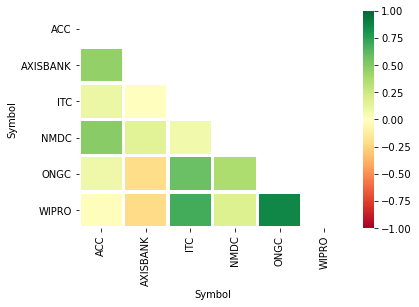

In [9]:
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()